<a href="https://colab.research.google.com/github/rezkydp/Percobaan-Ke-2/blob/main/Latihan_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Impor paket yang diperlukan untuk penyaringan gambar.

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

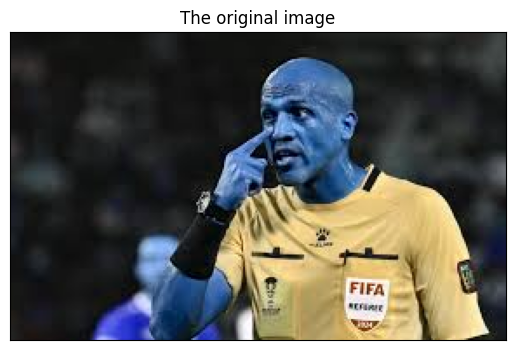

In [21]:
ref = cv2.imread('Wasit_Botak.jpg')
plt.imshow(ref), plt.grid(False)

# while learning how to perform spatial filtering,
# you can also note how to apply different python commands.
plt.title('The original image')
plt.xticks([])
plt.yticks([])
plt.show()

Ada dua faktor kunci dalam menerapkan filter pada gambar dalam pemrosesan gambar digital; 1) jenis kernel (dan ukuran), dan 2) metode padding (padding adalah prosedur ekstrapolasi yang menggambarkan keluaran kernel di atas batas gambar).

Ada berbagai metode untuk mendefinisikan kernel dan memperkenalkan metode padding di OpenCV. Tidak seperti MATLAB yang parameter kernelnya didefinisikan dengan sangat mudah, di OpenCV Anda memiliki kontrol lebih besar atas parameter dan harus menempuh jalan yang lebih panjang untuk mencapai tujuan.

# 1-Filter rata-rata

Di bawah ini, Anda melihat cara mendefinisikan kernel rata-rata yang sangat sederhana dan menerapkannya pada gambar Anda



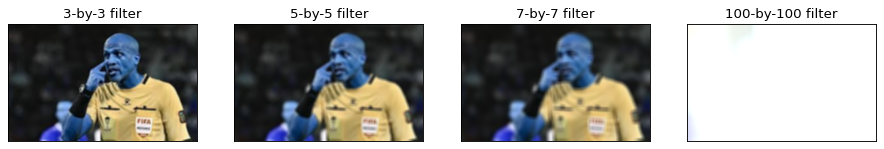

In [35]:
# Defining a kernel using numpy.
kernel_100 = np.ones((100,100),np.float32)/1000
kernel_7 = np.ones((7,7),np.float32)/49
kernel_5 = np.ones((5,5),np.float32)/25
kernel_3 = np.ones((3,3),np.float32)/9

# Convolves an image with the kernel.
# -1 means that the center of the kernel is located on the center pixel.
# compare two kernel sizes.
filtered_100 = cv2.filter2D(ref,-1,kernel_100)
filtered_7 = cv2.filter2D(ref,-1,kernel_7)
filtered_5 = cv2.filter2D(ref,-1,kernel_5)
filtered_3 = cv2.filter2D(ref,-1,kernel_3)

# plot the results in two subplots.
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(141), plt.imshow(filtered_3), plt.title('3-by-3 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(142), plt.imshow(filtered_5), plt.title('5-by-5 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(143), plt.imshow(filtered_7), plt.title('7-by-7 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(144), plt.imshow(filtered_100), plt.title('100-by-100 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.show()

Perintah lengkap untuk melakukan filter spasial 2D pada gambar di OpenCV adalah cv2.filter2D dengan daftar parameter berikut. Beberapa parameter tidak selalu digunakan.

cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])

src – gambar masukan.

ddepth – kedalaman gambar tujuan yang diinginkan; jika negatif, maka akan sama dengan src.depth(); kombinasi src.depth() dan ddepth berikut didukung:

src.depth() = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F

src.depth() = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F

src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F

src.depth() = CV_64F, ddepth = -1/CV_64F

ketika ddepth=-1, gambar keluaran akan memiliki kedalaman yang sama dengan sumbernya.

kernel – kernel konvolusi (atau lebih tepatnya kernel korelasi), matriks floating point saluran tunggal; jika Anda ingin menerapkan kernel yang berbeda ke saluran yang berbeda, pisahkan gambar ke dalam bidang warna terpisah menggunakan split() dan proses secara individual.

anchor – jangkar kernel yang menunjukkan posisi relatif titik yang difilter dalam kernel; jangkar harus berada di dalam kernel; nilai default (-1,-1) berarti jangkar berada di pusat kernel.

Jangkar dapat diganti dengan satu -1, yang menunjukkan bahwa pusat kernel berada di piksel tengahnya.

delta – nilai opsional yang ditambahkan ke piksel yang difilter sebelum menyimpannya di dst.

borderType – metode ekstrapolasi piksel (lihat borderInterpolate() untuk detailnya).

Cara lain yang mudah untuk menerapkan filter rata-rata sederhana adalah dengan menggunakan fungsi cv2.blur(). Fungsi tersebut dapat diterapkan seperti di bawah ini:

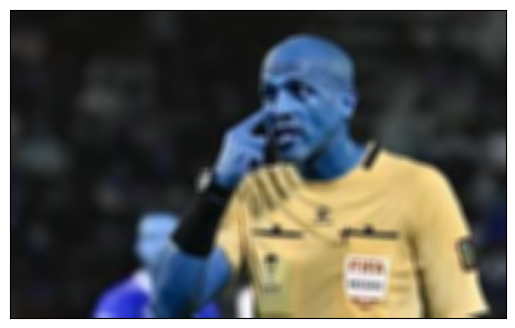

(<matplotlib.image.AxesImage at 0x799640011bd0>,
 None,
 ([], []),
 ([], []),
 None)

In [23]:
# you can check the docs for further information.
blurred = cv2.blur(ref, (5, 5), -1)

plt.imshow(blurred), plt.grid(False), plt.xticks([]), plt.yticks([]), plt.show()

# 2-Padding
Seperti yang telah kami sebutkan sebelumnya, salah satu faktor kunci dalam menerapkan filter pada gambar adalah memahami cara mengekstrapolasi nilai batas gambar sementara beberapa bagian kernel dihilangkan dari batas gambar. "borderType" adalah parameter yang menangani fungsi kernel ini. Biasanya, fungsi tersebut tidak dipanggil secara langsung. Fungsi ini digunakan di dalam FilterEngine dan copyMakeBorder() untuk menghitung tabel guna ekstrapolasi cepat. Artinya, pertama-tama kita harus membuat gambar yang diberi batas (padded) lalu menerapkan filter pada gambar tersebut, bukan pada gambar asli.

Berbagai jenis batas, batas gambar, dilambangkan dengan '|'



BORDER_REPLICATE: aaaaaa|abcdefgh|hhhhhhh
BORDER_REFLECT: fedcba|abcdefgh|hgfedcb
BORDER_REFLECT_101: gfedcb|abcdefgh|gfedcba
BORDER_WRAP: cdefgh|abcdefgh|abcdefg
BORDER_CONSTANT: iiiiii|abcdefgh|iiiiiii dengan beberapa 'i' yang ditentukan




Untuk membuat gambar berbingkai, kami menggunakan perintah dan argumen berikut. Dengan menggunakan perintah ini, Anda dapat menyisipkan berbagai ukuran bingkai di setiap sisi gambar.

cv2.copyMakeBorder(src, top, bottom, left, right, borderType[, dst[, value]])

src – Gambar sumber.

Size(src.cols+left+right, src.rows+top+bottom)

top, bottom, left, right – Parameter yang menentukan berapa banyak piksel di setiap arah dari persegi panjang gambar sumber yang akan diekstrapolasi. Misalnya, top=1, bottom=1, left=1, right=1 berarti bingkai selebar 1 piksel perlu dibuat.

borderType – Jenis bingkai. Salah satu jenis bingkai yang dideklarasikan di atas.

value – Nilai bingkai jika borderType==BORDER_CONSTANT .

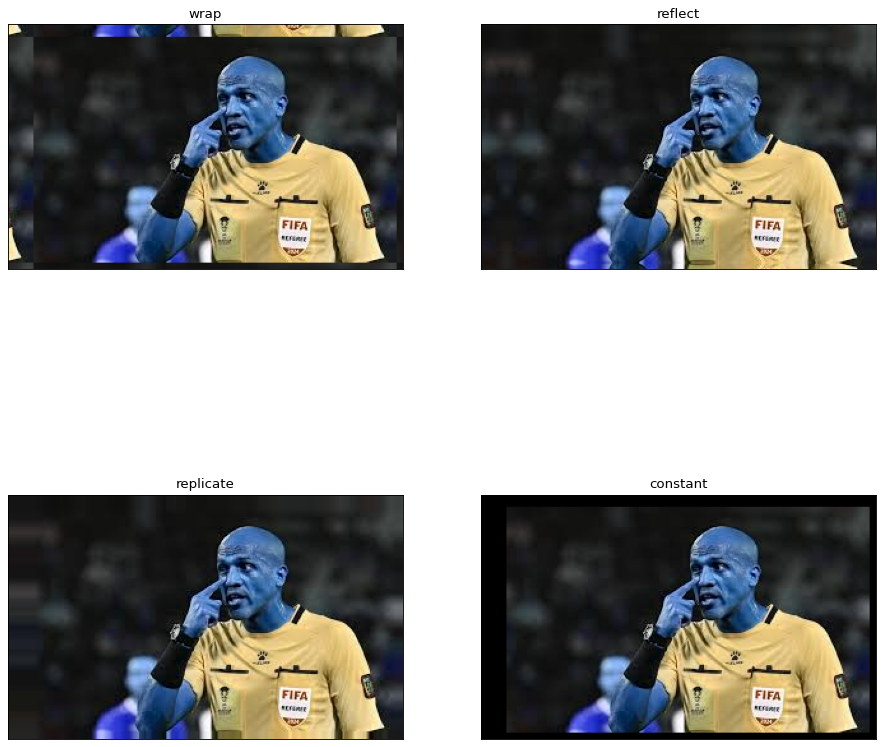

In [24]:
top = 10; bottom = 5; left = 20; right = 5
const = 100
img2 = cv2.copyMakeBorder(ref, top, bottom, left, right,
                          cv2.BORDER_WRAP)
img3 = cv2.copyMakeBorder(ref, top, bottom, left, right,
                          cv2.BORDER_REFLECT)
img4 = cv2.copyMakeBorder(ref, top, bottom, left, right,
                          cv2.BORDER_REPLICATE)
img5 = cv2.copyMakeBorder(ref, top, bottom, left, right,
                          cv2.BORDER_CONSTANT, const)

# Display the images
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(221), plt.imshow(img2), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('wrap')

plt.subplot(222), plt.imshow(img3), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('reflect')

plt.subplot(223), plt.imshow(img4), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('replicate')

plt.subplot(224), plt.imshow(img5), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('constant')

plt.show()

# 3-User-defined kernels
One can apply user-defined kernels just like the way we applied in section 1. For example, consider applying the following kernel (which is a vertical gradient filter) on the image.

⎡⎣⎢111000−1−1−1⎤⎦⎥

(([], []), ([], []))

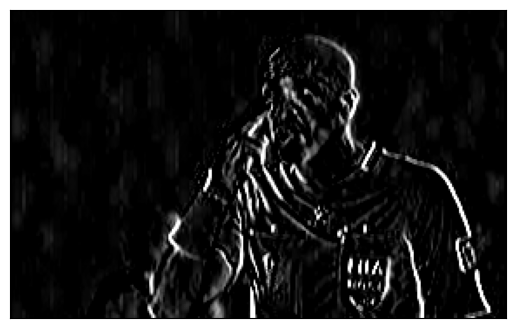

In [25]:
# vertical gradient kernel
# define a random kernel
vertical_gd = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

# apply it.
filter_v = cv2.filter2D(ref[:, :, 2], -1, vertical_gd)

# show in a different colormap.
plt.imshow(filter_v, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

# 4-Median filtering
Median filter adalah filter non-linier yang sangat berguna dalam menghilangkan atau mengurangi noise salt-and-pepper. Fungsi medianBlur di OpenCV dirancang untuk melakukan median filtering.

cv2.medianBlur(src, ksize[, dst])

src – masukan gambar 1-, 3-, atau 4-saluran; ketika ksize adalah 3 atau 5, kedalaman gambar harus CV_8U, CV_16U, atau CV_32F, untuk ukuran aperture yang lebih besar, hanya dapat berupa CV_8U.

ksize – ukuran linear aperture; harus ganjil dan lebih besar dari 1, misalnya: 3, 5, 7 ...

Untuk lebih memahami efek median filtering, pertama-tama kita tambahkan beberapa noise ke gambar.

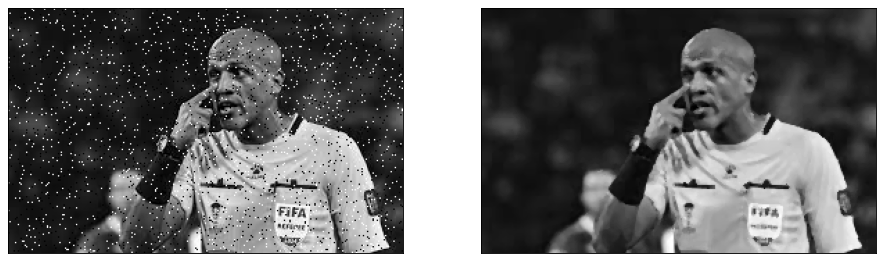

In [26]:
s_and_p = np.random.rand(ref.shape[0], ref.shape[1])

# if we consider 5% salt and pepper noise, we'd like to have
# 2.5% salt and 2.5% pepper. thus:
salt = s_and_p > .975
pepper = s_and_p < .025

# in order to add some noise, we should turn off black (pepper) locations and
# turn on white (white) locations.
channel_2 = np.atleast_1d(ref[:, :, 1])
noisy = np.zeros_like(channel_2)

for i in range(channel_2.shape[0]*channel_2.shape[1]):
  if salt.ravel()[i] == 1:
    noisy.ravel()[i] = 255
  elif pepper.ravel()[i] == 1:
    noisy.ravel()[i] = 0
  else:
    noisy.ravel()[i] = channel_2.ravel()[i]

# apply median filter with size 3
Med = cv2.medianBlur(noisy, 3)

# Display the results
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.xticks([]), plt.yticks([])
plt.imshow(noisy, cmap='gray'), plt.grid(False)
plt.subplot(122), plt.xticks([]), plt.yticks([])
plt.imshow(Med, cmap='gray'), plt.grid(False)
plt.show()

# 5- Penyaringan Gaussian
Ada beberapa cara untuk melakukan penyaringan Gaussian pada gambar:

1 menggunakan fungsi cv2.GaussianBlur(),
dan,

2 menggunakan cv2.sepFilter2D() setelah membuat dua kernel horizontal dan vertikal yang terpisah dan menerapkannya.

Namun, pertama-tama, kita perlu memiliki gambar yang berisik; khususnya dengan menambahkan derau Gaussian ke dalamnya. Untuk membuat gambar seperti itu, kita menggunakan Numpy untuk membuat derau Gaussian acak dan kemudian menambahkannya ke gambar.

(<matplotlib.image.AxesImage at 0x79963fbec3a0>, None)

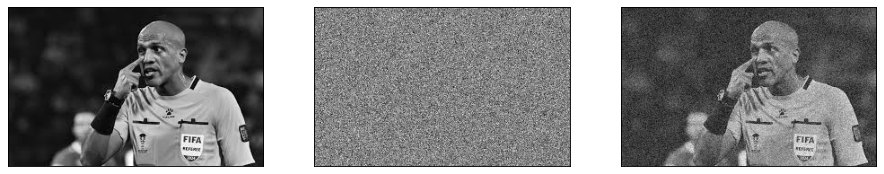

In [27]:
# Creating random normal (gaussian) noise with pre-defined mean and std.
# The noisy image should be the size of the reference image.
mean = 0
sigma = 20.0
gauss_noise = np.random.normal(mean, sigma, (ref.shape[0], ref.shape[1]))

# Convert RGB image to Grayscale image using cvtColor()
gray = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)

# Add gaussian noise to the image
g_noisy = gray + gauss_noise # Gaussian noisy image

# Showing gray image, noise image, and noisy image
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131), plt.xticks([]), plt.yticks([])
plt.imshow(gray, cmap='gray'), plt.grid(False)
plt.subplot(132), plt.xticks([]), plt.yticks([])
plt.imshow(gauss_noise, cmap='gray'), plt.grid(False)
plt.subplot(133), plt.xticks([]), plt.yticks([])
plt.imshow(g_noisy, cmap='gray'), plt.grid(False)

Sekarang, kita menggunakan cv2.GaussianBlur() sederhana untuk mengurangi derau gaussian pada gambar g_noisy yang dibuat di atas.

cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])

src – gambar input; gambar dapat memiliki sejumlah saluran, yang diproses secara independen, tetapi kedalamannya harus CV_8U, CV_16U, CV_16S, CV_32F atau CV_64F.

ksize – Ukuran kernel Gaussian. ksize.width dan ksize.height dapat berbeda tetapi keduanya harus positif dan ganjil. Atau, keduanya dapat berupa nol dan kemudian dihitung dari sigma*.

sigmaX – Deviasi standar kernel Gaussian dalam arah X.

sigmaY – Deviasi standar kernel Gaussian dalam arah Y; jika sigmaY adalah nol, maka ia ditetapkan sama dengan sigmaX, jika kedua sigma adalah nol, maka keduanya dihitung dari ksize.width dan ksize.height , masing-masing (lihat getGaussianKernel() untuk detailnya); untuk mengendalikan hasil sepenuhnya terlepas dari kemungkinan modifikasi di masa mendatang dari semua semantik ini, disarankan untuk menentukan semua ksize, sigmaX, dan sigmaY.

(([], []), ([], []))

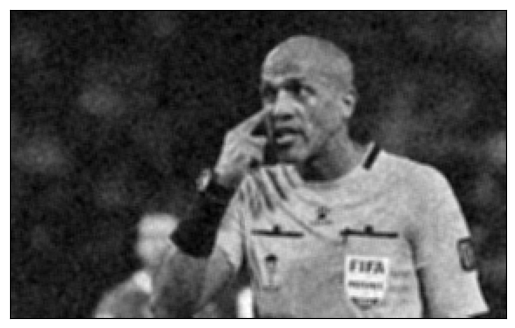

In [28]:
g_filtered = cv2.GaussianBlur(g_noisy, (3, 3), 20, 20)

# Display the result
plt.imshow(g_filtered, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

Untuk menggunakan fungsi `cv2.sepFilter2D()`, kita harus membuat kernel gaussian. Ini dilakukan menggunakan `cv2.getGaussianKernel()`. Fungsi ini membuat koefisien gaussian 1 dimensi.

**cv2.getGaussianKernel(ksize, sigma[, ktype])**

**ksize** – Ukuran aperture. Harus ganjil dan positif.

**sigma** – Simpangan baku Gaussian. Jika tidak positif, dihitung dari ksize sebagai `sigma = 0,3*((ksize-1)*0,5 - 1) + 0,8`.

**ktype** – Jenis koefisien filter. Bisa berupa `CV_32f` atau `CV_64F`.

[[0.33319442]
 [0.33361117]
 [0.33319442]]


(<matplotlib.image.AxesImage at 0x79963fc5e470>, None)

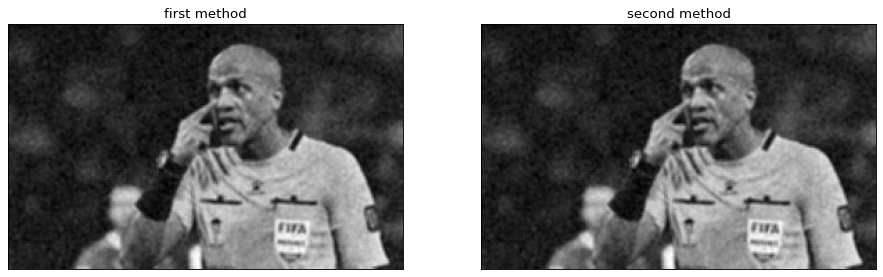

In [29]:
# Create a single gaussian kernel
g_kernel = cv2.getGaussianKernel(3, 20)
print(g_kernel)

# Apply two separate kernels over the image.
g_filtered_2 = cv2.sepFilter2D(g_noisy, -1, g_kernel, g_kernel)

# Displaying the results.
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.xticks([]), plt.yticks([]), plt.title('first method')
plt.imshow(g_filtered, cmap='gray'), plt.grid(False)
plt.subplot(122), plt.xticks([]), plt.yticks([]), plt.title('second method')
plt.imshow(g_filtered_2, cmap='gray'), plt.grid(False)